In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

,Unnamed: 0,집계일시,평균속도
0,0,2021050100,98.63
1,1,2021050101,100.53
2,2,2021050102,99.86
3,3,2021050103,99.34
4,4,2021050104,93.64


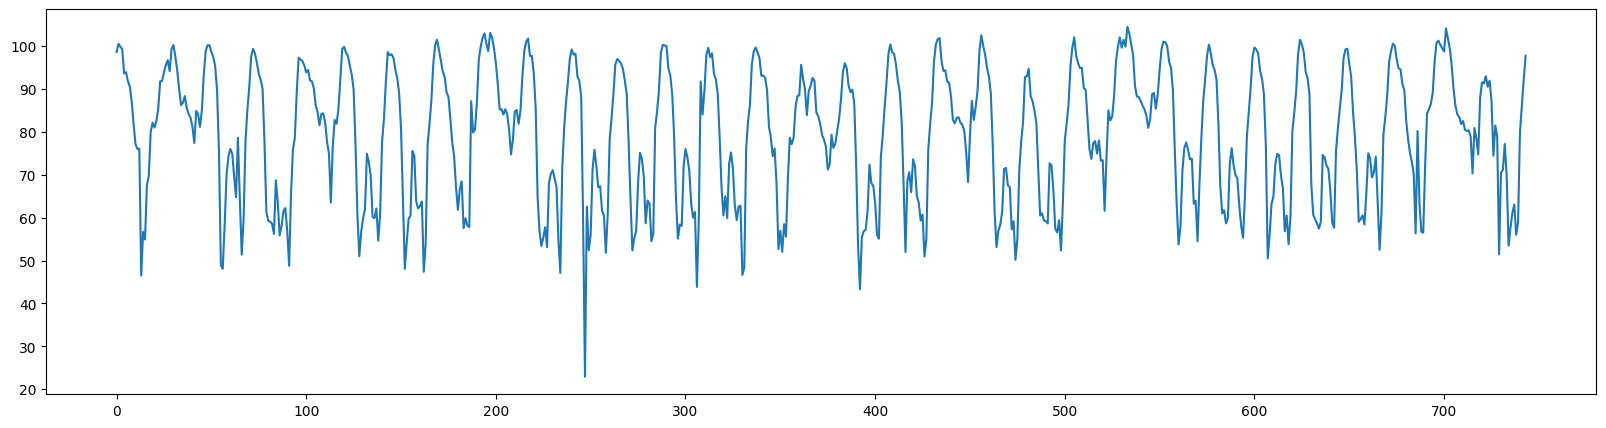

In [6]:
df = pd.read_csv("서인천IC-부평IC 평균속도.csv", encoding='CP949')
plt.figure(figsize=(20,5))
plt.plot(range(len(df)), df["평균속도"])
df.head()

In [7]:
df_train = df.iloc[:-24*7]

C:\Users\dus_4\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\seasonal.py:360: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\dus_4\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\seasonal.py:360: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\dus_4\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\seasonal.py:360: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\dus_4\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\seasonal.py:360: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()


<Figure size 640x480 with 0 Axes>

C:\Users\dus_4\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dus_4\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dus_4\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dus_4\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


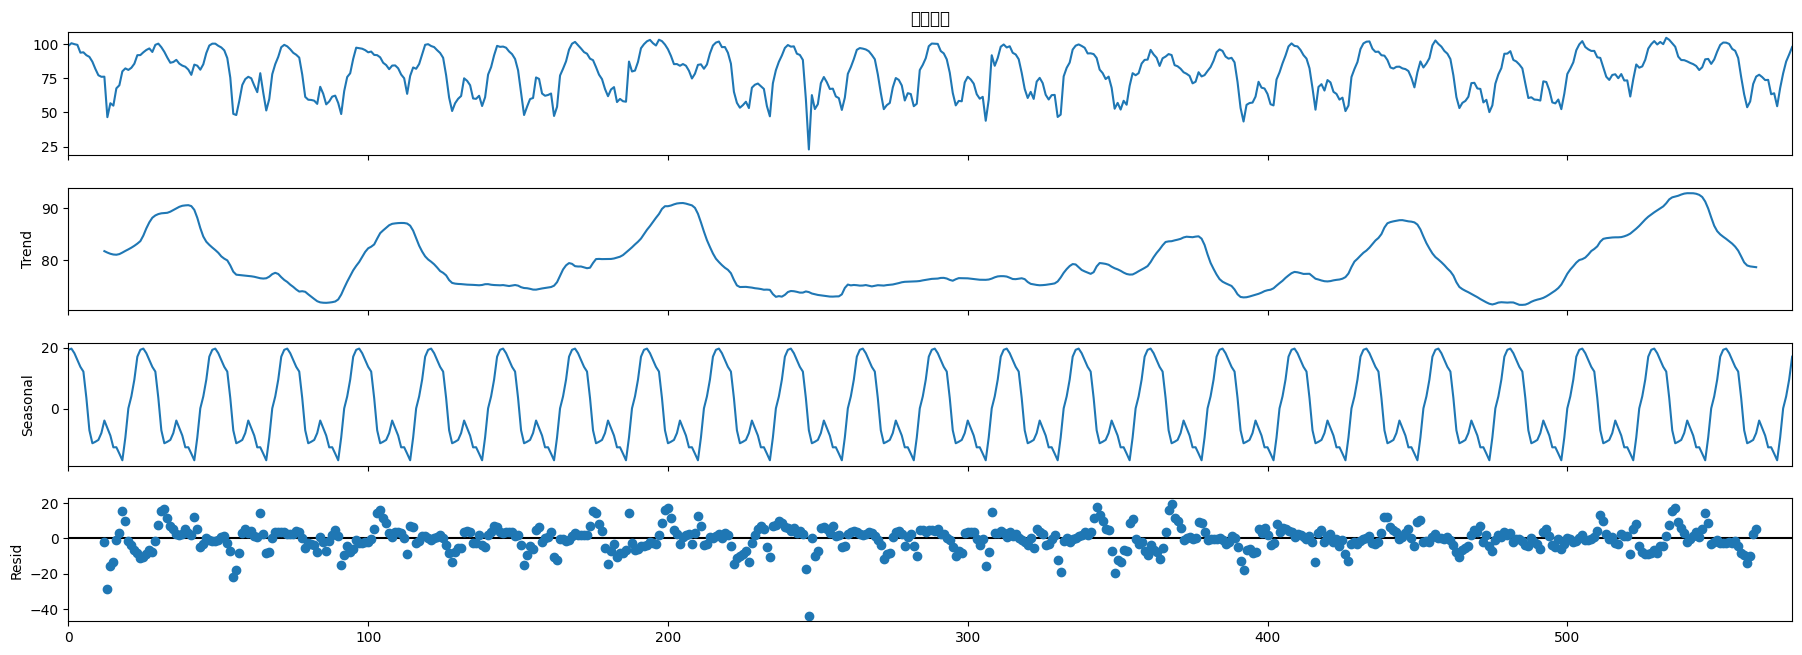

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_train["평균속도"], model="additive", period=24)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,7)
plt.show()

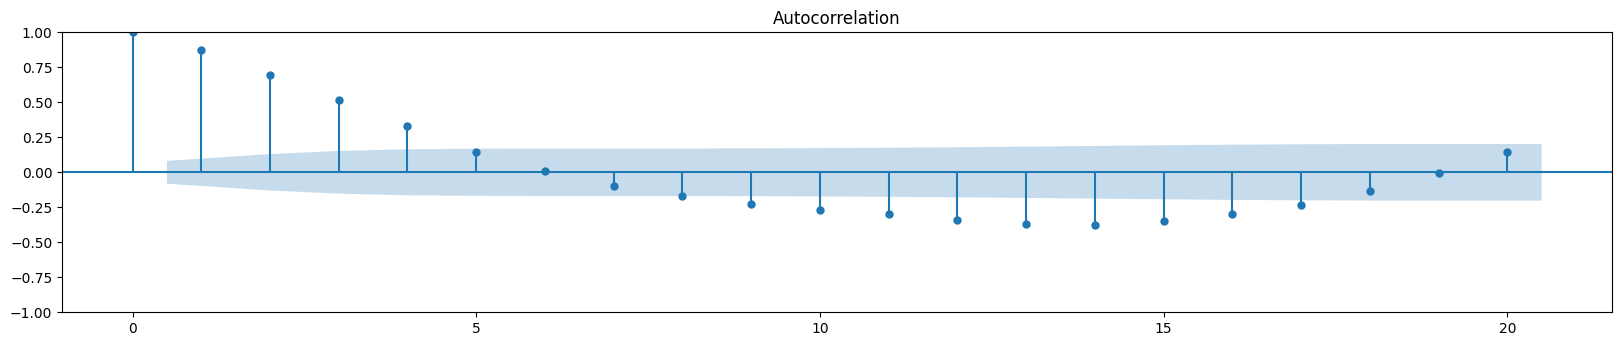

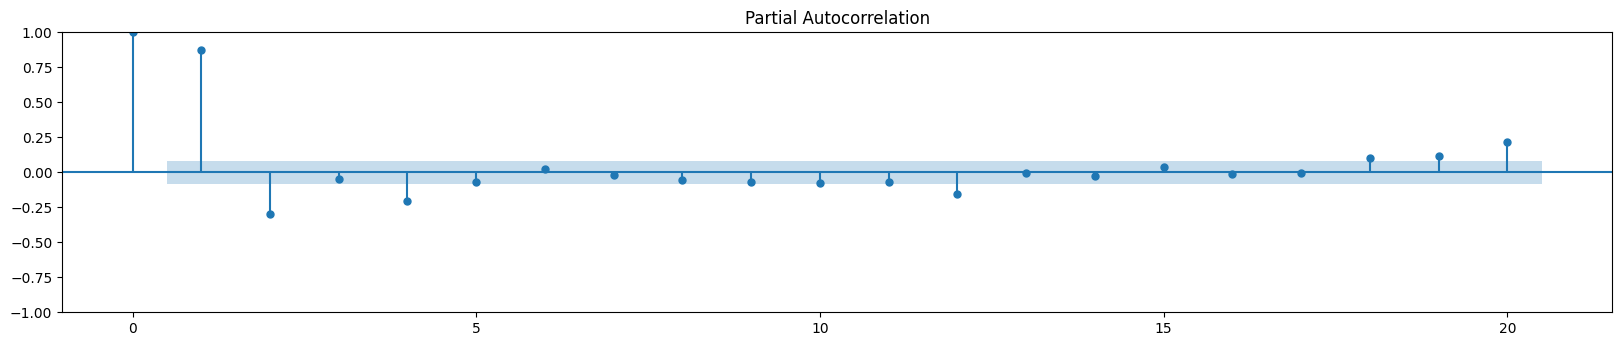

In [9]:
import statsmodels.api as sm
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_train["평균속도"], lags=20, ax=ax1)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_train["평균속도"], lags=20, ax=ax1)

# ARIMA

In [10]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
from tqdm import tqdm

In [11]:
p = range(0,3)
d = range(1,2)
q = range(0,6)

pdq = list(itertools.product(p,d,q))

aic = []
params = []

with tqdm(total = len(pdq)) as pg:
    for i in pdq:
        pg.update(1)
        try:
            model = SARIMAX(df_train["평균속도"], order=(i))
            model_fit = model.fit()
            aic.append(round(model_fit.aic,2))
            params.append((i))
        except:
            continue

 78%|███████████████████████████████████████████████████████████████▊                  | 14/18 [00:41<00:18,  4.73s/it]C:\Users\dus_4\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dus_4\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 83%|████████████████████████████████████████████████████████████████████▎             | 15/18 [00:42<00:11,  3.80s/it]C:\Users\dus_4\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting paramet

In [12]:
optimal1 = [(params[i],j) for i,j in enumerate(aic) if j == min(aic)]
model_opt1 = ARIMA(df_train["평균속도"], order = optimal1[0][0])
model_opt1_fit = model_opt1.fit()
model_opt1_fit.summary()

C:\Users\dus_4\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   평균속도   No. Observations:                  576
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -1926.684
Date:                Sun, 26 May 2024   AIC                           3867.368
Time:                        15:43:59   BIC                           3897.849
Sample:                             0   HQIC                          3879.256
                                - 576                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7637      0.054     32.371      0.000       1.657       1.870
ar.L2         -0.8299      0.045    -18.572      0.000      -0.917      -0.742
ma.L1         -1.6578      0.072    -22.997      0.000      -1.799      -1.517
ma.L2          0.4531      0.072      6.269      0.000       0.311       0.595
ma.L3          0.3017      0.076      3.980      0.000       0.153       0.450
ma.L4         -0.0968      0.053     -1.830      0.067      -0.201       0.007
sigma2        47.1684      2.646     17.824      0.000      41.982      52.355
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               428.80
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.11
Prob(H) (two-sided):                  0.07   Kurtosis:                         7.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\dus_4\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


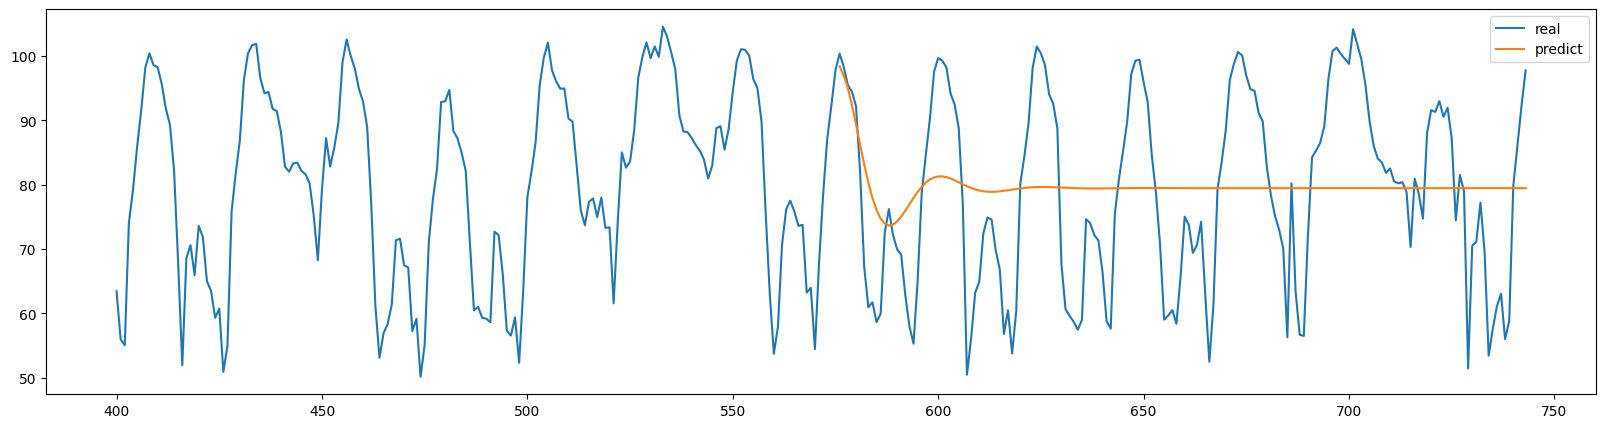

In [17]:
model1 = ARIMA(df_train["평균속도"], order=optimal1[0][0])
model1_fit = model1.fit()
forecast1 = model1_fit.forecast(steps=24*7)

plt.figure(figsize=(20,5))
plt.plot(range(400,744), df["평균속도"].iloc[400:],label="real")
plt.plot(forecast1, label="predict")
plt.legend()
plt.show()

In [15]:
def MAPEval(y_pred, y_true):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPEval(forecast1, df["평균속도"].iloc[-24*7:])

16.500539610815693

# SARIMAX

In [19]:
p = range(0,3)
d = range(1,2)
q = range(0,6)
m = 24*7
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],m) for x in list(itertools.product(p,d,q))]

aic = []
params = []

with tqdm(total = len(pdq) * len(seasonal_pdq)) as pg:
    for i in pdq:
        for j in seasonal_pdq:
            pg.update(1)
            try:
                model = SARIMAX(df_train["평균속도"], order=(i), season_order = (j))
                model_fit = model.fit()
                aic.append(round(model_fit.aic,2))
                params.append((i,j))
            except:
                continue

  0%|                                                                                          | 0/324 [00:00<?, ?it/s]C:\Users\dus_4\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['season_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\dus_4\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['season_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
  1%|▊                                                                                 | 3/324 [00:00<00:12, 26.15it/s]C:\Users\dus_4\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning

In [20]:
optimal2 = [(params[i],j) for i,j in enumerate(aic) if j == min(aic)]
model_opt2 = SARIMAX(df_train["평균속도"], order = optimal2[0][0][0], seasonal_order = optimal2[0][0][1])
model_opt2_fit = model_opt2.fit()
model_opt2_fit.summary()

C:\Users\dus_4\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 평균속도   No. Observations:                  576
Model:             SARIMAX(2, 1, 4)x(0, 1, [], 168)   Log Likelihood               -1363.194
Date:                              Sun, 26 May 2024   AIC                           2740.388
Time:                                      21:10:46   BIC                           2768.450
Sample:                                           0   HQIC                          2751.494
                                              - 576                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1596      0.083      1.928      0.054      -0.003       0.322
ar.L2         -0.8800      0.081    -10.864      0.000      -1.039      -0.721
ma.L1         -0.5546      0.081     -6.816      0.000      -0.714      -0.395
ma.L2          0.6495      0.097      6.723      0.000       0.460       0.839
ma.L3         -0.2957      0.048     -6.119      0.000      -0.390      -0.201
ma.L4         -0.3281      0.041     -8.090      0.000      -0.408      -0.249
sigma2        47.4572      1.961     24.195      0.000      43.613      51.302
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               477.44
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\dus_4\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


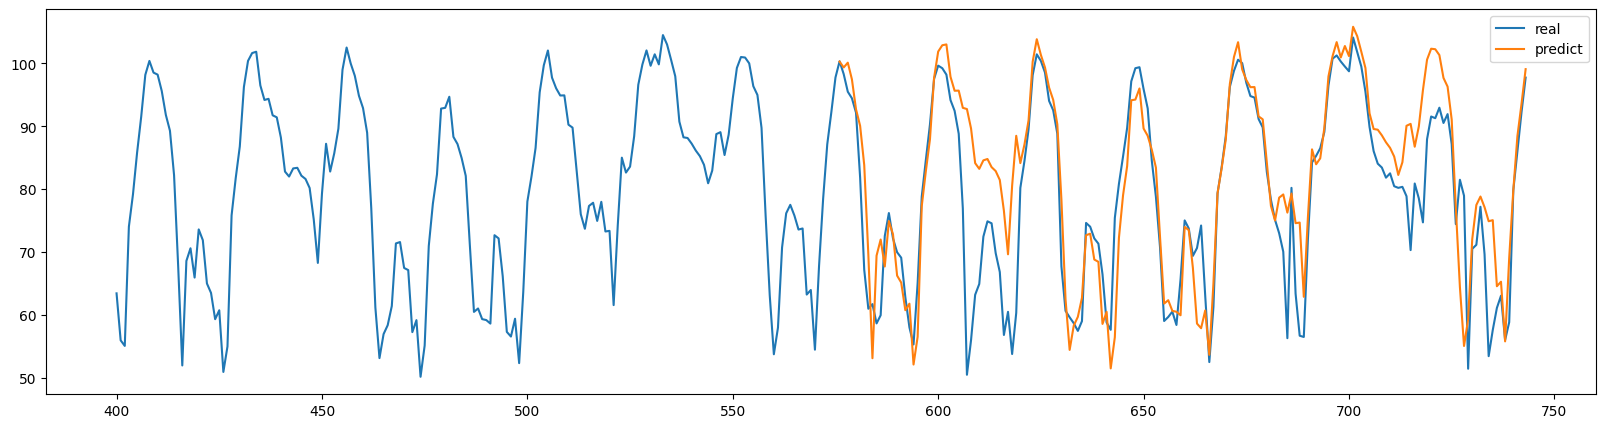

In [22]:
model2 = SARIMAX(df_train["평균속도"], order=optimal2[0][0][0], seasonal_order=optimal2[0][0][1])
model2_fit = model2.fit(disp=0)
forecast2 = model2_fit.forecast(steps=24*7)

plt.figure(figsize=(20,5))
plt.plot(range(400,744), df["평균속도"].iloc[400:], label="real")
plt.plot(forecast2, label="predict")
plt.legend()
plt.show()

In [23]:
def MAPEval(y_pred, y_true):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPEval(forecast2, df["평균속도"].iloc[-24*7:])

8.751792835530967